In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold

In [2]:
df = pd.read_csv("crossval_info/train_image_df.csv")
df.drop(
    [
        'dcm_path',
#         'StudyInstanceUID',
        'SeriesInstanceUID',
        'ImageInstanceUID',
        'img_shape',
    ],
    axis=1, inplace=True
)

df.rename(
    columns=
    {
        'id': 'image_id',
        'y_label': 'str_label',
        'StudyInstanceUID': 'study_id'
    }, inplace=True)
df['image_id'] += '_image'
df['study_id'] += '_study'
df

,image_id,x_min,y_min,x_max,y_max,str_label,negative,typical,indeterminate,atypical,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,0,1,0,0,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,0,1,0,0,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,1,0,0,0,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,0,1,0,0,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,0,1,0,0,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,0,1,0,0,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3
9889,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,0,1,0,0,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3
9890,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,0,1,0,0,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3
9891,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,0,1,0,0,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3


In [3]:
df.rename(columns={'negative':'0','typical':'1',"indeterminate":'2',
                   "atypical":"3"}, inplace=True)
df.head()

,image_id,x_min,y_min,x_max,y_max,str_label,0,1,2,3,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,0,1,0,0,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,0,1,0,0,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,1,0,0,0,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,0,1,0,0,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,0,1,0,0,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3


In [4]:
labels = []
def get_label(row):
    for c in ['0','1','2','3']:
        if row[c]==1:
            labels.append(int(c))
df.apply(get_label, axis=1)
print("label modified")

labels = {'class':labels}
df['class'] = pd.DataFrame(labels)

df.drop(
    [
        '0',
        '1',
        '2',
        '3'
    ],
    axis=1, inplace=True
)
df

label modified


,image_id,x_min,y_min,x_max,y_max,str_label,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label,class
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3,1
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3,1
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2,0
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3,1
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3,1
9889,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3,1
9890,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3,1
9891,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3,1


In [5]:
df['binary_class'] = 0
df.loc[df[df['class']!=0].index, 'binary_class'] = 1
df

,image_id,x_min,y_min,x_max,y_max,str_label,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label,class,binary_class
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3,1,1
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3,1,1
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2,0,0
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3,1,1
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3,1,1
9889,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3,1,1
9890,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3,1,1
9891,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3,1,1


In [6]:
skf_meta = pd.read_csv('crossval_info/original_differ_skf/df_image_study_class_fold.csv')
skf_meta

,image_id,boxes,label,study_id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,class,fold
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75_study,0,1,0,0,1,0
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed_study,1,0,0,0,0,1
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7_study,0,1,0,0,1,0
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2_study,0,0,0,1,3,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e_study,0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06_study,1,0,0,0,0,4
6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e_study,1,0,0,0,0,1
6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814_study,0,1,0,0,1,4
6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d_study,0,1,0,0,1,1


In [7]:
df = df.merge(skf_meta[['image_id', 'fold']], on='image_id')
df.rename(columns={'fold': 'skf_fold'}, inplace=True)
df

,image_id,x_min,y_min,x_max,y_max,str_label,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label,class,binary_class,skf_fold
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3,1,1,0
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3,1,1,0
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2,0,0,1
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3,1,1,0
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3,1,1,4
9889,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3,1,1,1
9890,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3,1,1,1
9891,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3,1,1,1


In [8]:
np.random.seed(25101996)
gkf = GroupKFold(n_splits=5)
df['gkf_fold'] = -1
for i, (train_index, test_index) in enumerate(gkf.split(df, groups=df.study_id.tolist())):
    df.loc[test_index, 'gkf_fold'] = i
df

,image_id,x_min,y_min,x_max,y_max,str_label,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label,class,binary_class,skf_fold,gkf_fold
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3,1,1,0,4
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3,1,1,0,4
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2,0,0,1,1
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3,1,1,0,3
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3,1,1,4,3
9889,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3,1,1,1,4
9890,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3,1,1,1,4
9891,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3,1,1,1,2


In [9]:
df = df[~((df['class']!=0)&(df['x_min']==0)&(df['x_max']==1)&(df['y_min']==0)&(df['y_max']==1))]
df.reset_index(inplace=True, drop=True)
df

,image_id,x_min,y_min,x_max,y_max,str_label,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label,class,binary_class,skf_fold,gkf_fold
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3,1,1,0,4
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3,1,1,0,4
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2,0,0,1,1
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3,1,1,0,3
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3,1,1,4,3
9585,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3,1,1,1,4
9586,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3,1,1,1,4
9587,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3,1,1,1,2


In [10]:
df = df[df['x_min'] >= 0]
df

,image_id,x_min,y_min,x_max,y_max,str_label,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label,class,binary_class,skf_fold,gkf_fold
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3,1,1,0,4
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3,1,1,0,4
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2,0,0,1,1
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3,1,1,0,3
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3,1,1,4,3
9585,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3,1,1,1,4
9586,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3,1,1,1,4
9587,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3,1,1,1,2


In [11]:
df['id'] = -1
df.loc[:, 'id'] = df.image_id.apply(lambda x: x.replace('_image', ''))
df

<ipython-input-11-1fc06d52f936>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = -1
/home/greylord/siim_covid/covid_env/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,image_id,x_min,y_min,x_max,y_max,str_label,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label,class,binary_class,skf_fold,gkf_fold,id
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3,1,1,0,4,000a312787f2
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3,1,1,0,4,000a312787f2
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2,0,0,1,1,000c3a3f293f
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3,1,1,0,3,0012ff7358bc
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3,1,1,0,3,0012ff7358bc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3,1,1,4,3,ffd9b6cf2961
9585,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3,1,1,1,4,ffdc682f7680
9586,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3,1,1,1,4,ffdc682f7680
9587,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3,1,1,1,2,ffe942c8655f


array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

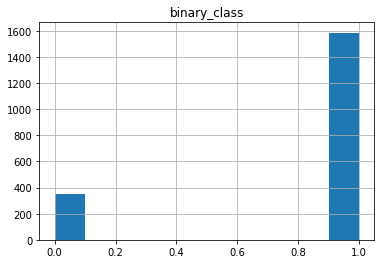

In [12]:
df[df.skf_fold == 0][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

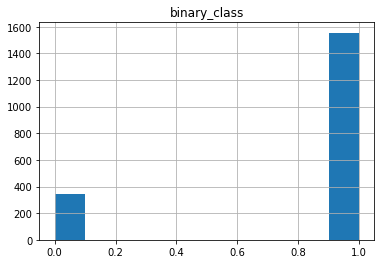

In [13]:
df[df.skf_fold == 1][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

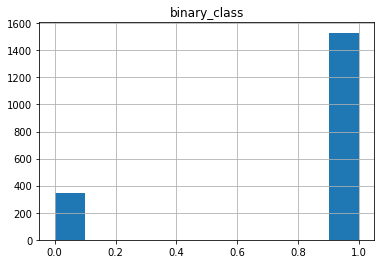

In [14]:
df[df.skf_fold == 2][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

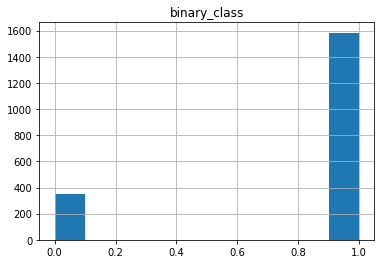

In [15]:
df[df.skf_fold == 3][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

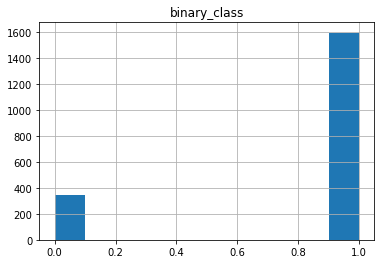

In [16]:
df[df.skf_fold == 4][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

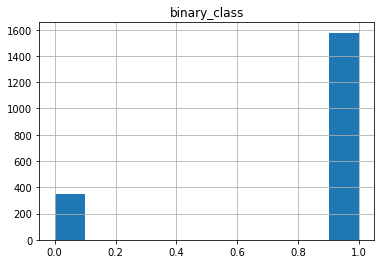

In [17]:
df[df.gkf_fold == 0][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

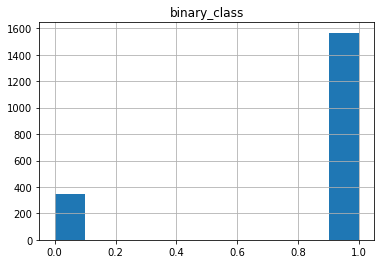

In [18]:
df[df.gkf_fold == 1][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

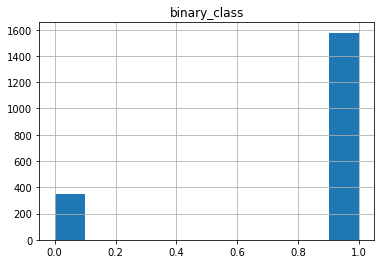

In [19]:
df[df.gkf_fold == 2][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

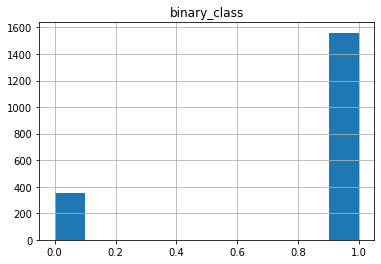

In [20]:
df[df.gkf_fold == 3][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'binary_class'}>]], dtype=object)

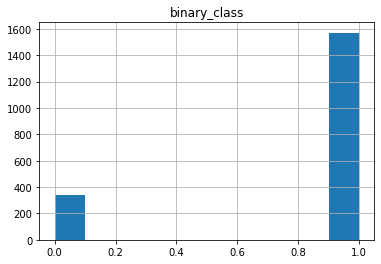

In [21]:
df[df.gkf_fold == 4][['binary_class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

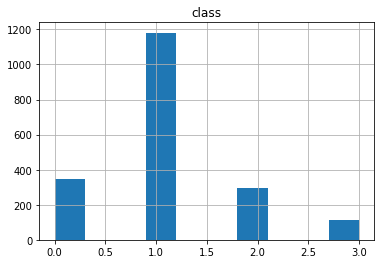

In [22]:
df[df.skf_fold == 0][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

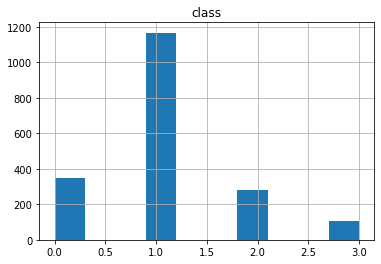

In [23]:
df[df.skf_fold == 1][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

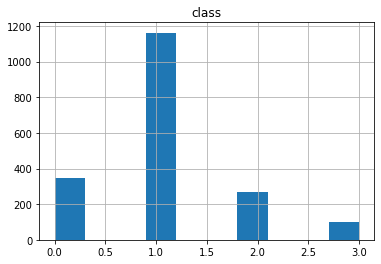

In [24]:
df[df.skf_fold == 2][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

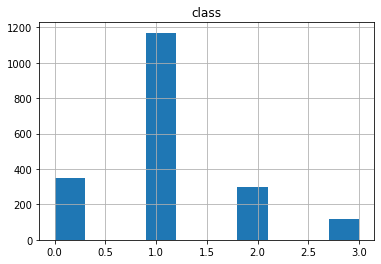

In [25]:
df[df.skf_fold == 3][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

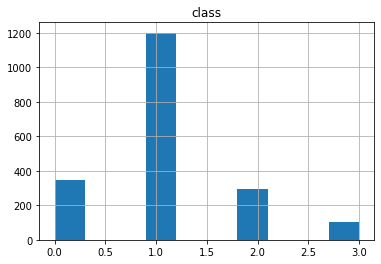

In [26]:
df[df.skf_fold == 4][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

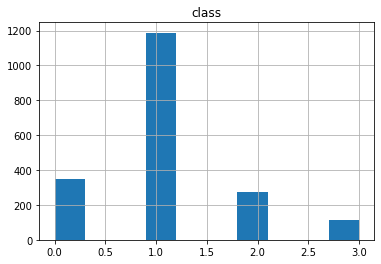

In [27]:
df[df.gkf_fold == 0][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

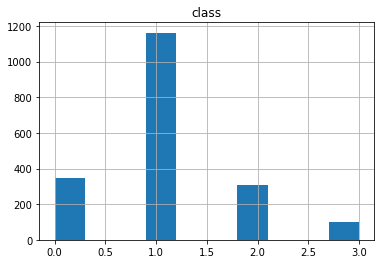

In [28]:
df[df.gkf_fold == 1][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

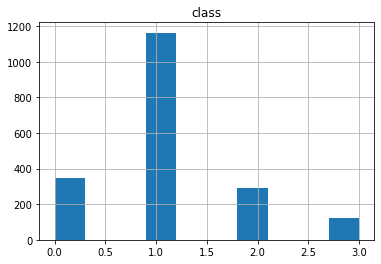

In [29]:
df[df.gkf_fold == 2][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

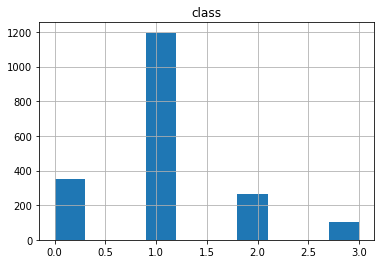

In [30]:
df[df.gkf_fold == 3][['class']].hist()

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

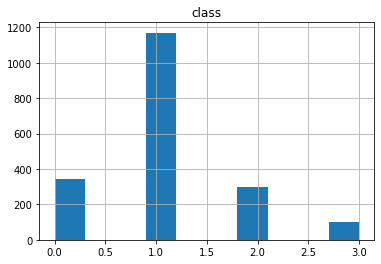

In [31]:
df[df.gkf_fold == 4][['class']].hist()

In [33]:
df.to_csv('detectron_prepared_data/detectron_prepared_df.csv', index=False)

In [32]:
df

,image_id,x_min,y_min,x_max,y_max,str_label,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label,class,binary_class,skf_fold,gkf_fold,id
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3,1,1,0,4,000a312787f2
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3,1,1,0,4,000a312787f2
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2,0,0,1,1,000c3a3f293f
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3,1,1,0,3,0012ff7358bc
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3,1,1,0,3,0012ff7358bc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3,1,1,4,3,ffd9b6cf2961
9585,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3,1,1,1,4,ffdc682f7680
9586,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3,1,1,1,4,ffdc682f7680
9587,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3,1,1,1,2,ffe942c8655f


In [36]:
df

,image_id,x_min,y_min,x_max,y_max,str_label,study_id,width,height,frac_xmin,frac_xmax,frac_ymin,frac_ymax,integer_label,class,binary_class,skf_fold,gkf_fold,id
0,000a312787f2_image,2245.91208,591.20528,3340.57370,2352.75472,typical,5776db0cec75_study,4256,3488,0.527705,0.784909,0.169497,0.674528,3,1,1,0,4,000a312787f2
1,000a312787f2_image,789.28836,582.43035,1815.94498,2499.73327,typical,5776db0cec75_study,4256,3488,0.185453,0.426679,0.166981,0.716667,3,1,1,0,4,000a312787f2
2,000c3a3f293f_image,0.00000,0.00000,1.00000,1.00000,negative,ff0879eb20ed_study,2832,2320,0.000000,0.000353,0.000000,0.000431,2,0,0,1,1,000c3a3f293f
3,0012ff7358bc_image,677.42216,197.97662,1545.21983,1197.75876,typical,9d514ce429a7_study,3056,2544,0.221670,0.505635,0.077821,0.470817,3,1,1,0,3,0012ff7358bc
4,0012ff7358bc_image,1792.69064,402.55250,2409.71798,1606.91050,typical,9d514ce429a7_study,3056,2544,0.586613,0.788520,0.158236,0.631647,3,1,1,0,3,0012ff7358bc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9584,ffd9b6cf2961_image,2197.38566,841.07361,2513.80265,1292.71119,typical,7eed9af03814_study,3050,2388,0.720454,0.824198,0.352208,0.541336,3,1,1,4,3,ffd9b6cf2961
9585,ffdc682f7680_image,1005.81250,1584.67711,1668.04163,2360.51048,typical,a0cb0b96fb3d_study,4256,3488,0.236328,0.391927,0.454323,0.676752,3,1,1,1,4,ffdc682f7680
9586,ffdc682f7680_image,2729.27083,332.26044,4225.52099,2936.84378,typical,a0cb0b96fb3d_study,4256,3488,0.641276,0.992839,0.095258,0.841985,3,1,1,1,4,ffdc682f7680
9587,ffe942c8655f_image,755.52522,144.33069,1183.39442,692.09119,typical,7d82d53204b8_study,1387,1140,0.544719,0.853204,0.126606,0.607098,3,1,1,1,2,ffe942c8655f


In [37]:
df.columns

Index(['image_id', 'x_min', 'y_min', 'x_max', 'y_max', 'str_label', 'study_id',
       'width', 'height', 'frac_xmin', 'frac_xmax', 'frac_ymin', 'frac_ymax',
       'integer_label', 'class', 'binary_class', 'skf_fold', 'gkf_fold', 'id'],
      dtype='object')

In [38]:
meta = df[['image_id', 'width', 'height', 'skf_fold', 'gkf_fold', 'id']]
meta.drop_duplicates(inplace=True)
meta.reset_index(inplace=True, drop=True)
meta

<ipython-input-38-56646c267aec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta.drop_duplicates(inplace=True)


,image_id,width,height,skf_fold,gkf_fold,id
0,000a312787f2_image,4256,3488,0,4,000a312787f2
1,000c3a3f293f_image,2832,2320,1,1,000c3a3f293f
2,0012ff7358bc_image,3056,2544,0,3,0012ff7358bc
3,001398f4ff4f_image,4280,3520,1,4,001398f4ff4f
4,001bd15d1891_image,3408,2800,3,3,001bd15d1891
...,...,...,...,...,...,...
6025,ffcc6edd9445_image,3480,4240,4,4,ffcc6edd9445
6026,ffd91a2c4ca0_image,3408,2800,1,2,ffd91a2c4ca0
6027,ffd9b6cf2961_image,3050,2388,4,3,ffd9b6cf2961
6028,ffdc682f7680_image,4256,3488,1,4,ffdc682f7680


In [39]:
meta.to_csv('detectron_prepared_data/meta_df.csv', index=False)